In [1]:
%reload_ext autoreload
%autoreload 2

In [17]:
from cereeberus import  MapperGraph, Interleave
import cereeberus.data.ex_mappergraphs as ex_mg

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.manifold import MDS

In [18]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import kmapper as km
from sklearn.cluster import DBSCAN
import networkx as nx
import multiprocessing as mp
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from itertools import combinations_with_replacement
import multiprocessing as mp
from tqdm import tqdm
import pickle

from cereeberus import Interleave, ReebGraph, MapperGraph
import image_mapper_comparison as imc

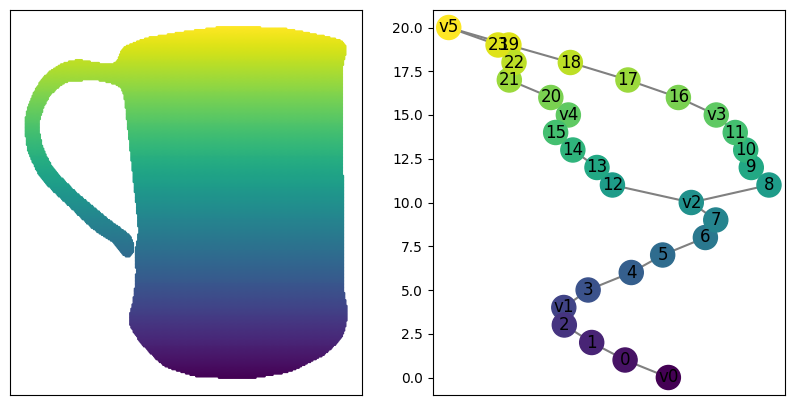

In [ ]:
points = imc.get_point_cloud_from_image("MPEG7_dataset/Cups/cup-4.gif", rotate_angle=0)  # good : 4  (270), 3 (180), 5 (270), 6 (0), 12 (270), 13 (0), 14 (270) , 15 (0), 16 (0),  19 (270)

G = imc.mapper_of_image(points)
G = imc.normalize_node_heights(G)
mapperG = imc.generate_mapper_from_graph(G, resolution=20)

# Extract y-values (second column of points) for color mapping
y_values = points[:, 1]
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# Plot the point cloud
ax[0].scatter(points[:, 0], points[:, 1], c= y_values, s=1)
#remove the axis numbers
ax[0].set_xticks([])
ax[0].set_yticks([])
mapperG.draw(ax=ax[1])
plt.savefig("cup_mapper.png", dpi=300)
plt.show()

# 1. Files we will compare: (not all will be used for actual experiments)

In [135]:
apple_files = ["MPEG7_dataset/Apples/apple-1.gif",
               "MPEG7_dataset/Apples/apple-2.gif",
               "MPEG7_dataset/Apples/apple-3.gif",
               "MPEG7_dataset/Apples/apple-14.gif",
               "MPEG7_dataset/Apples/apple-5.gif",
               "MPEG7_dataset/Apples/apple-6.gif",
               "MPEG7_dataset/Apples/apple-7.gif",
               "MPEG7_dataset/Apples/apple-8.gif",
               "MPEG7_dataset/Apples/apple-10.gif",
               "MPEG7_dataset/Apples/apple-20.gif"]
                   

cup_files = ["MPEG7_dataset/Cups/cup-11.gif",
            "MPEG7_dataset/Cups/cup-12.gif",
            "MPEG7_dataset/Cups/cup-18.gif",
            "MPEG7_dataset/Cups/cup-16.gif",
            "MPEG7_dataset/Cups/cup-9.gif",
            "MPEG7_dataset/Cups/cup-7.gif",
            "MPEG7_dataset/Cups/cup-4.gif",
            "MPEG7_dataset/Cups/cup-1.gif",
            "MPEG7_dataset/Cups/cup-19.gif",
            "MPEG7_dataset/Cups/cup-20.gif"]



heart_files = ["MPEG7_dataset/Hearts/Heart-1.gif",
               "MPEG7_dataset/Hearts/Heart-2.gif",
               "MPEG7_dataset/Hearts/Heart-12.gif",
               "MPEG7_dataset/Hearts/Heart-15.gif", 
               "MPEG7_dataset/Hearts/Heart-5.gif", 
               "MPEG7_dataset/Hearts/Heart-6.gif",
               "MPEG7_dataset/Hearts/Heart-7.gif",
               "MPEG7_dataset/Hearts/Heart-8.gif",
               "MPEG7_dataset/Hearts/Heart-9.gif",
               "MPEG7_dataset/Hearts/Heart-10.gif"]


fork_files = ["MPEG7_dataset/Forks/fork-20.gif",
                "MPEG7_dataset/Forks/fork-2.gif",
                "MPEG7_dataset/Forks/fork-3.gif",
                "MPEG7_dataset/Forks/fork-11.gif",
                "MPEG7_dataset/Forks/fork-5.gif",
                "MPEG7_dataset/Forks/fork-6.gif",
                "MPEG7_dataset/Forks/fork-7.gif",
                "MPEG7_dataset/Forks/fork-8.gif",
                "MPEG7_dataset/Forks/fork-17.gif",
                "MPEG7_dataset/Forks/fork-15.gif"]


horseshoes_files = ["MPEG7_dataset/Horseshoes/horseshoe-1.gif",
                    "MPEG7_dataset/Horseshoes/horseshoe-2.gif",
                    "MPEG7_dataset/Horseshoes/horseshoe-16.gif",
                    "MPEG7_dataset/Horseshoes/horseshoe-20.gif",
                    "MPEG7_dataset/Horseshoes/horseshoe-13.gif",
                    "MPEG7_dataset/Horseshoes/horseshoe-6.gif",
                    "MPEG7_dataset/Horseshoes/horseshoe-7.gif",
                    "MPEG7_dataset/Horseshoes/horseshoe-8.gif",
                    "MPEG7_dataset/Horseshoes/horseshoe-9.gif",
                    "MPEG7_dataset/Horseshoes/horseshoe-10.gif"]


seasnake_files = ["MPEG7_dataset/Seasnakes/sea_snake-1.gif",
                "MPEG7_dataset/Seasnakes/sea_snake-2.gif",
                "MPEG7_dataset/Seasnakes/sea_snake-15.gif",
                "MPEG7_dataset/Seasnakes/sea_snake-4.gif",
                "MPEG7_dataset/Seasnakes/sea_snake-14.gif",
                "MPEG7_dataset/Seasnakes/sea_snake-6.gif",
                "MPEG7_dataset/Seasnakes/sea_snake-7.gif",
                "MPEG7_dataset/Seasnakes/sea_snake-8.gif",
                "MPEG7_dataset/Seasnakes/sea_snake-20.gif",
                "MPEG7_dataset/Seasnakes/sea_snake-10.gif"]

# 2. Generate mappers for some chosen shapes

In [136]:
apple_mappers = [imc.generate_mapper(apple_files[i]) for i in range(10)]
cup_mappers = [imc.generate_mapper(cup_files[i]) for i in range(10)]
fork_mappers = [imc.generate_mapper(fork_files[i]) for i in range(10)]
heart_mappers = [imc.generate_mapper(heart_files[i]) for i in range(10)]
horseshoe_mappers = [imc.generate_mapper(horseshoes_files[i]) for i in range(10)]
seasnake_mappers = [imc.generate_mapper(seasnake_files[i]) for i in range(10)]


In [138]:
apple_dicts = {i+1: apple_mappers[i] for i in range(len(apple_mappers))}
cup_dicts = {i+1: cup_mappers[i] for i in range(len(cup_mappers))}
fork_dicts = {i+1: fork_mappers[i] for i in range(len(fork_mappers))}
heart_dicts = {i+1: heart_mappers[i] for i in range(len(heart_mappers))}
horseshoe_dicts = {i+1: horseshoe_mappers[i] for i in range(len(horseshoe_mappers))}
seasnake_dicts = {i+1: seasnake_mappers[i] for i in range(len(seasnake_mappers))}    

In [139]:
# create a large dataframe with apple0, apple1, apple2, ... cup0, cup1, cup2, ... and keep it empty
categories = ['apple', 'cup', 'fork', 'heart', 'horseshoe', 'seasnake']
names = [categories[i]+ str(j+1) for i in range(len(categories)) for j in range(10)]
df = pd.DataFrame(index=names, columns=names, dtype=float)

In [140]:
df.columns

Index(['apple1', 'apple2', 'apple3', 'apple4', 'apple5', 'apple6', 'apple7',
       'apple8', 'apple9', 'apple10', 'cup1', 'cup2', 'cup3', 'cup4', 'cup5',
       'cup6', 'cup7', 'cup8', 'cup9', 'cup10', 'fork1', 'fork2', 'fork3',
       'fork4', 'fork5', 'fork6', 'fork7', 'fork8', 'fork9', 'fork10',
       'heart1', 'heart2', 'heart3', 'heart4', 'heart5', 'heart6', 'heart7',
       'heart8', 'heart9', 'heart10', 'horseshoe1', 'horseshoe2', 'horseshoe3',
       'horseshoe4', 'horseshoe5', 'horseshoe6', 'horseshoe7', 'horseshoe8',
       'horseshoe9', 'horseshoe10', 'seasnake1', 'seasnake2', 'seasnake3',
       'seasnake4', 'seasnake5', 'seasnake6', 'seasnake7', 'seasnake8',
       'seasnake9', 'seasnake10'],
      dtype='object')

In [ ]:
SAVE_FILE = "interleave_results.pkl"

categories = ["apple", "cup", "fork", "heart", "horseshoe", "seasnake"]
mapper_lists = [apple_mappers, cup_mappers, fork_mappers, heart_mappers, horseshoe_mappers, seasnake_mappers]

# #test run with only apple and cup
# categories = ["apple", "cup"]
# mapper_lists = [apple_mappers, cup_mappers]

#flatten the list of mappers
mapper_list = sum(mapper_lists, [])

# dictionary mapping mapper objects to their names
mapper_dict = {mapper: name for mapper, name in zip(mapper_list, names)}

def save_results(results):
    """Save results periodically to a file."""
    with open(SAVE_FILE, "wb") as f:
        pickle.dump(results, f)

def load_results():
    """Load previously saved results if available."""
    if os.path.exists(SAVE_FILE):
        with open(SAVE_FILE, "rb") as f:
            return pickle.load(f)
    return {}

def pairwise_interleave(mapperpairs):
    """Interleave function to be applied in parallel."""
    mapper1, mapper2 = mapperpairs
    return Interleave(mapper1, mapper2).fit()

def parallel_compute_interleave(mapper_list):
    
    """Compute interleaving in parallel for all mapper pairs (both intra- and cross-category)."""
    mapper_pairs = list(combinations_with_replacement(mapper_list, 2))  # Generate all pairs

    num_procs = 64
    print(f"Using {num_procs} cores")

    # Load existing results
    result_dict = load_results()

    # Filter out already computed pairs
    remaining_pairs = [p for p in mapper_pairs if (mapper_dict[p[0]], mapper_dict[p[1]]) not in result_dict]



    with mp.get_context("fork").Pool(num_procs) as pool:
        for (m1, m2), res in zip(remaining_pairs, tqdm(pool.imap(pairwise_interleave, remaining_pairs), total=len(remaining_pairs), desc="Processing pairs")):
            key = (mapper_dict[m1], mapper_dict[m2])
            result_dict[key] = res
            
            # Save results every 10 iterations
            if len(result_dict) % 10 == 0:
                save_results(result_dict)

    # Final save after completion
    save_results(result_dict)
    return result_dict


In [143]:
result_dict = parallel_compute_interleave(mapper_list)

Using 64 cores


Processing pairs: 100%|█████████▉| 1829/1830 [23:45<00:00,  1.28it/s]


In [ ]:
with open("interleave_results.pkl", "rb") as f:
    results = pickle.load(f)

# now `results` is a dictionary
print(results.keys())
print(len(results))

dict_keys([('apple1', 'apple1'), ('apple1', 'apple2'), ('apple1', 'apple3'), ('apple1', 'apple4'), ('apple1', 'apple5'), ('apple1', 'apple6'), ('apple1', 'apple7'), ('apple1', 'apple8'), ('apple1', 'apple9'), ('apple1', 'apple10'), ('apple1', 'cup1'), ('apple1', 'cup2'), ('apple1', 'cup3'), ('apple1', 'cup4'), ('apple1', 'cup5'), ('apple1', 'cup6'), ('apple1', 'cup7'), ('apple1', 'cup8'), ('apple1', 'cup9'), ('apple1', 'cup10'), ('apple1', 'fork1'), ('apple1', 'fork2'), ('apple1', 'fork3'), ('apple1', 'fork4'), ('apple1', 'fork5'), ('apple1', 'fork6'), ('apple1', 'fork7'), ('apple1', 'fork8'), ('apple1', 'fork9'), ('apple1', 'fork10'), ('apple1', 'heart1'), ('apple1', 'heart2'), ('apple1', 'heart3'), ('apple1', 'heart4'), ('apple1', 'heart5'), ('apple1', 'heart6'), ('apple1', 'heart7'), ('apple1', 'heart8'), ('apple1', 'heart9'), ('apple1', 'heart10'), ('apple1', 'horseshoe1'), ('apple1', 'horseshoe2'), ('apple1', 'horseshoe3'), ('apple1', 'horseshoe4'), ('apple1', 'horseshoe5'), ('app

In [145]:
for key, value in results.items():
    # check if there is a row column with the same name

    df.loc[key[0], key[1]] = value
    df.loc[key[1], key[0]] = value

In [ ]:
# df to csv

df.to_csv('distance_results.csv')

# 3. Experiments

In [14]:
data = pd.read_csv('distance_results.csv', index_col=0)
data = data.drop(columns=[col for col in data.columns if col.startswith("butterfly")], index=[idx for idx in data.index if idx.startswith("butterfly")])
# convert everything to numeric
data = data.apply(pd.to_numeric, errors='coerce') 


## Heatmap


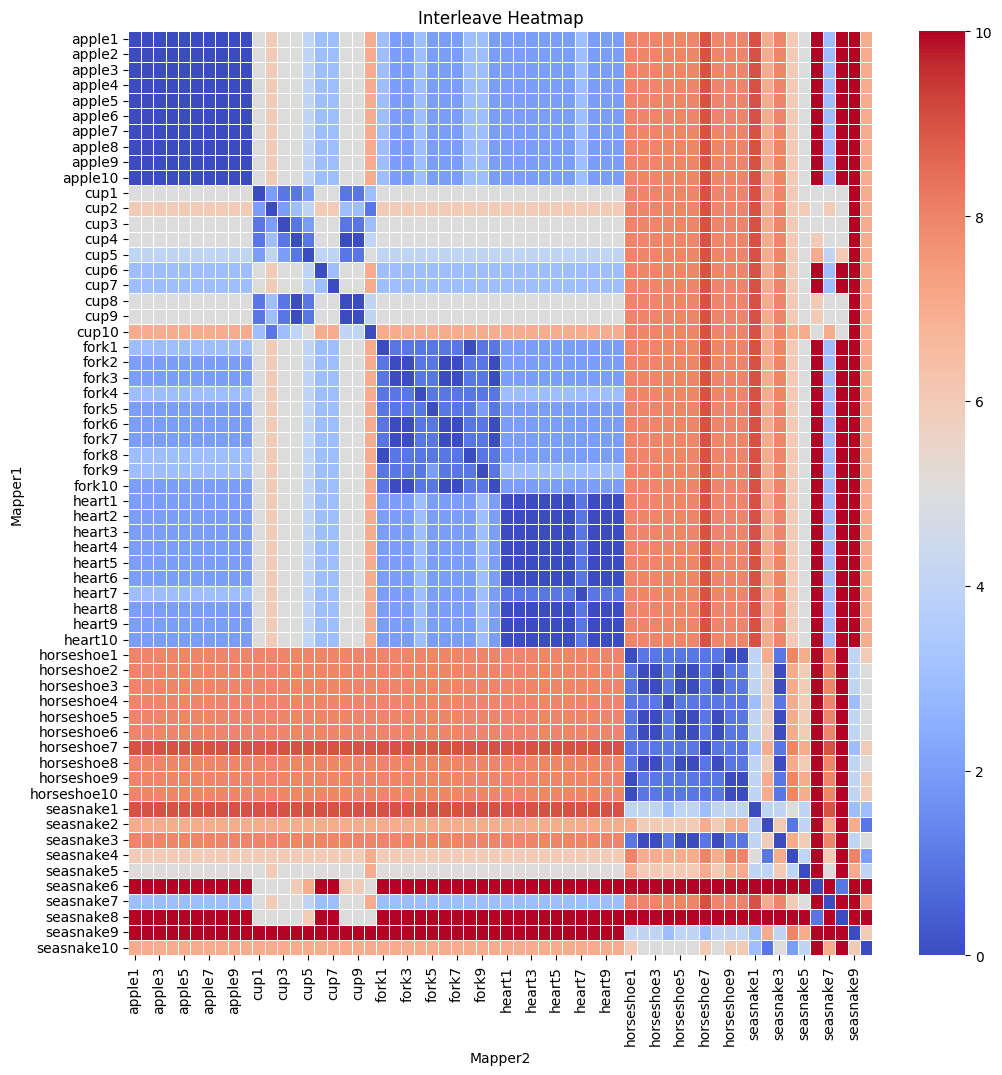

In [15]:

plt.figure(figsize=(12, 12))
sns.heatmap(data, annot=False, cmap="coolwarm", linewidths=0.5)

# Add labels and title
plt.xlabel("Mapper2")
plt.ylabel("Mapper1")
plt.title("Interleave Heatmap")

# Show the plot
plt.show()

## MDS plot


Normalized stress: 0.1394
['apple', 'cup', 'fork', 'heart', 'horseshoe', 'seasnake']


/mnt/home/ghoshis3/.conda/envs/interleavingenv/lib/python3.12/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


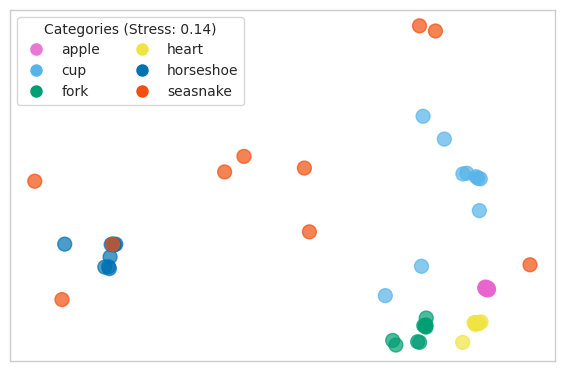

In [92]:
# Assuming 'data' is your pairwise distance matrix
distance_matrix = data

# Compute MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=0, normalized_stress=True)
mds_results = mds.fit_transform(distance_matrix)
print(f"Normalized stress: {mds.stress_:.4f}")

# Get labels from index
labels = distance_matrix.index

# Extract categories by removing numbers (apple1 -> apple)
categories = [''.join([i for i in label if not i.isdigit()]) for label in labels]
unique_cats = ['apple', 'cup', 'fork', 'heart', 'horseshoe', 'seasnake']
print(unique_cats)

# Create color mapping
palette= [
    "#E765CDE0",  # Pink
    "#56B4E9",  # Sky blue
    "#009E73",  # Bluish green
    "#F0E442",  # Yellow
    "#0072B2",  # Blue
    "#F04F0F",  # Vermillion
]
color_map = {cat: palette[i] for i, cat in enumerate(unique_cats)}

# Add small random noise to prevent overlapping points
np.random.seed(42)  # For reproducibility
jitter_strength = 0.04  # Adjust based on your MDS scale

# Apply jitter
mds_jittered = mds_results.copy()
mds_jittered[:, 0] += np.random.normal(0, jitter_strength, size=len(mds_results))
mds_jittered[:, 1] += np.random.normal(0, jitter_strength, size=len(mds_results))

# Create figure
plt.figure(figsize=(6, 4))

# Plot with colors based on true categories (using jittered points)
scatter = plt.scatter(
    mds_jittered[:, 0], 
    mds_jittered[:, 1], 
    c=[color_map[cat] for cat in categories],  # Map each point to its category color
    alpha=0.7,
    s=100
)

# Add legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label=cat, 
               markerfacecolor=color_map[cat], markersize=10)
    for cat in unique_cats
]
plt.legend(handles=legend_elements, title=f"Categories (Stress: {mds.stress_:.2f})", loc='upper left', ncol=2, frameon=True)

plt.tight_layout()  # Prevent legend cutoff
plt.xticks([])
plt.yticks([])
plt.savefig('mds_plot.png', dpi=300)
plt.show()

## KNN with loo-cv validation

In [ ]:
distdf = pd.read_csv('distance_results.csv', index_col=0)
print(distdf.index)
dist_matrix = distdf.values
dist_matrix.shape

Index(['apple1', 'apple2', 'apple3', 'apple4', 'apple5', 'apple6', 'apple7',
       'apple8', 'apple9', 'apple10', 'cup1', 'cup2', 'cup3', 'cup4', 'cup5',
       'cup6', 'cup7', 'cup8', 'cup9', 'cup10', 'fork1', 'fork2', 'fork3',
       'fork4', 'fork5', 'fork6', 'fork7', 'fork8', 'fork9', 'fork10',
       'heart1', 'heart2', 'heart3', 'heart4', 'heart5', 'heart6', 'heart7',
       'heart8', 'heart9', 'heart10', 'horseshoe1', 'horseshoe2', 'horseshoe3',
       'horseshoe4', 'horseshoe5', 'horseshoe6', 'horseshoe7', 'horseshoe8',
       'horseshoe9', 'horseshoe10', 'seasnake1', 'seasnake2', 'seasnake3',
       'seasnake4', 'seasnake5', 'seasnake6', 'seasnake7', 'seasnake8',
       'seasnake9', 'seasnake10'],
      dtype='object')


(60, 60)

## LOO-CV accuracy for k candidates, to tune k

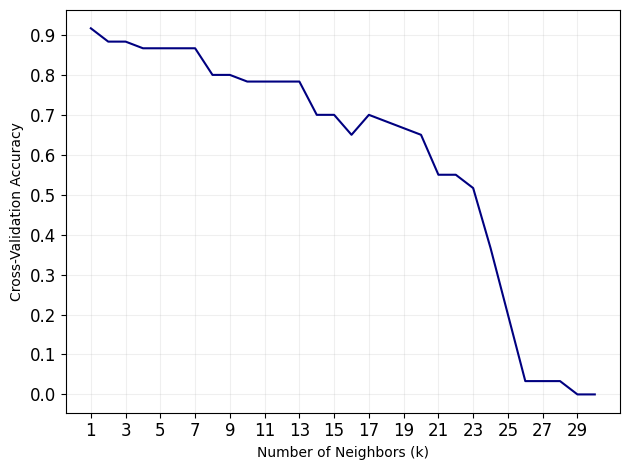

In [45]:
loo = LeaveOneOut()
k_values = range(1, 31)
mean_accuracies = []

for k in k_values:
    preds = []
    for train_idx, test_idx in loo.split(dist_matrix):

        # distance among training samples
        D_train = dist_matrix[np.ix_(train_idx, train_idx)]

        # distance from test sample(s) to training samples
        D_test = dist_matrix[np.ix_(test_idx, train_idx)]

        knn = KNeighborsClassifier(n_neighbors=k, metric="precomputed")
        knn.fit(D_train, np.array(categories)[train_idx])
        preds.extend(knn.predict(D_test))

    mean_accuracies.append(accuracy_score(categories, preds))

plt.xticks(fontsize=12)

plt.yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], fontsize=12)

# Plot accuracy for each k
plt.plot(k_values, mean_accuracies, color="navy")
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
# plt.title('KNN Cross-Validation Accuracy vs. k')
plt.xticks(k_values[::2])
plt.grid(alpha=0.2)
plt.tight_layout()
plt.savefig('knn_accuracy_vs_k.png', dpi=300)
plt.show()



## LOOCV accuracy and confusion matrix for k=1

Categories: ['apple' 'cup' 'fork' 'heart' 'horseshoe' 'seasnake']
LOO-CV Classification Accuracy: 91.67%


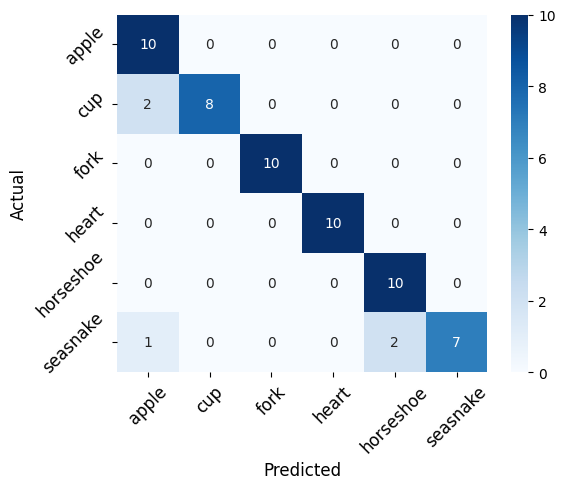

In [ ]:
dist_df = pd.read_csv('distance_results.csv', index_col=0)
#drop butterfly rows and columns
dist_df = dist_df.drop(columns=[col for col in dist_df.columns if col.startswith("butterfly")], index=[idx for idx in dist_df.index if idx.startswith("butterfly")])

labels = dist_df.index
dist_matrix = dist_df.values  # Convert DataFrame to NumPy array


# Extract category names by removing numbers
categories = np.array([label.rstrip("0123456789") for label in labels])

# Print unique categories
print("Categories:", np.unique(categories))

#  Run KNN with Leave-One-Out Cross-Validation (LOO-CV)
loo = LeaveOneOut()
n_neighbors = 1  # Adjust as needed

y_true, y_pred = [], []

for train_index, test_index in loo.split(dist_matrix):
    # training dist matrix (symmetric)
    train_dist = dist_matrix[np.ix_(train_index, train_index)]
    # test dist matrix
    test_dist = dist_matrix[np.ix_(test_index, train_index)].reshape(1, -1) # reshape for single sample

    # test_dist = dist_matrix[np.ix_(test_index, train_index)]

    knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric="precomputed")
    knn.fit(train_dist, categories[train_index])  # Train on category labels

    pred = knn.predict(test_dist)
    
    y_true.append(categories[test_index][0])
    y_pred.append(pred[0])

# Compute Classification Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"LOO-CV Classification Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix Visualization
cm = confusion_matrix(y_true, y_pred, labels=np.unique(categories))

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(categories), yticklabels=np.unique(categories))
plt.xlabel("Predicted", fontsize=12)    
plt.ylabel("Actual", fontsize=12)
# plt.title("Confusion Matrix")
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.tight_layout()
plt.show()

## Nearest-neighbor agreement and permutation test

In [11]:
#nearest-neighbor agreement (exclude diagonal)
D = dist_matrix
y = categories
D_copy = D.copy()
np.fill_diagonal(D_copy, np.inf)
nn_idx = np.argmin(D_copy, axis=1)
nn_agreement = (y == y[nn_idx]).mean()
print("Nearest-neighbor agreement:", nn_agreement)

#permutation test for LOOCV k=1 significance
import random
n_perm = 200
orig = scores[1]
perm_scores = []
for _ in range(n_perm):
    y_perm = np.random.permutation(y)
    perm_scores.append(cross_val_score(KNeighborsClassifier(n_neighbors=1, metric='precomputed'),
                                       D, y_perm, cv=loo).mean())
p_val = (np.sum(np.array(perm_scores) >= orig) + 1) / (n_perm + 1)
print("Permutation p-value:", p_val)


Nearest-neighbor agreement: 0.9
Permutation p-value: 0.004975124378109453


# 4. Visulalize the objects for the paper

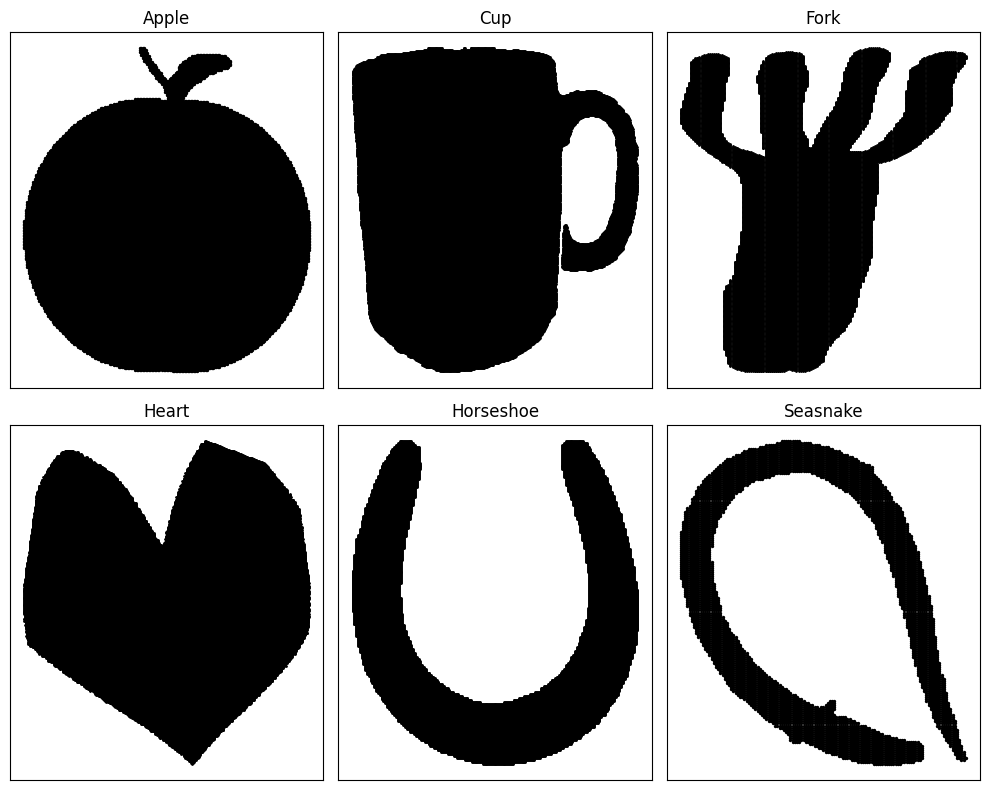

In [158]:
apple = apple_files[0]
cup = cup_files[7]
fork = fork_files[3]
heart = heart_files[8]
horseshoe = horseshoes_files[0]
seasnake = seasnake_files[5]

# Create figure with the right size
fig = plt.figure(figsize=(10, 8))

# Create subplots using subplot2grid
ax1 = plt.subplot2grid(shape=(2, 6), loc=(0, 0), colspan=2)
ax2 = plt.subplot2grid(shape=(2, 6), loc=(0, 2), colspan=2)
ax3 = plt.subplot2grid(shape=(2, 6), loc=(0, 4), colspan=2)
ax4 = plt.subplot2grid(shape=(2, 6), loc=(1, 0), colspan=2)
ax5 = plt.subplot2grid(shape=(2, 6), loc=(1, 2), colspan=2)
ax6 = plt.subplot2grid(shape=(2, 6), loc=(1, 4), colspan=2)

# Get point clouds
apoints = imc.get_point_cloud_from_image(apple, rotate_angle=0)
cpoints = imc.get_point_cloud_from_image(cup, rotate_angle=0)
fpoints = imc.get_point_cloud_from_image(fork, rotate_angle=0)
hrpoints = imc.get_point_cloud_from_image(heart, rotate_angle=0)
hpoints = imc.get_point_cloud_from_image(horseshoe, rotate_angle=0)
spoints = imc.get_point_cloud_from_image(seasnake, rotate_angle=0)

# Scatter plots (all black points)
ax1.scatter(apoints[:, 0], apoints[:, 1], s=2, color='black')  # or c='k'
ax1.set_title("Apple")
ax1.set_xticks([])
ax1.set_yticks([])

ax2.scatter(cpoints[:, 0], cpoints[:, 1], s=1, color='black')
ax2.set_title("Cup")
ax2.set_xticks([])
ax2.set_yticks([])

ax3.scatter(fpoints[:, 0], fpoints[:, 1], s=1, color='black')
ax3.set_title("Fork")
ax3.set_xticks([])
ax3.set_yticks([])

ax4.scatter(hrpoints[:, 0], hrpoints[:, 1], s=1, color='black')
ax4.set_title("Heart")
ax4.set_xticks([])
ax4.set_yticks([])

ax5.scatter(hpoints[:, 0], hpoints[:, 1], s=1, color='black')
ax5.set_title("Horseshoe")
ax5.set_xticks([])
ax5.set_yticks([])

ax6.scatter(spoints[:, 0], spoints[:, 1], s=2, color='black')
ax6.set_title("Seasnake")
ax6.set_xticks([])
ax6.set_yticks([])
plt.tight_layout()
plt.savefig("point_clouds.png", dpi=300)
plt.show()
